In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,ShuffleSplit
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape

(1338, 7)

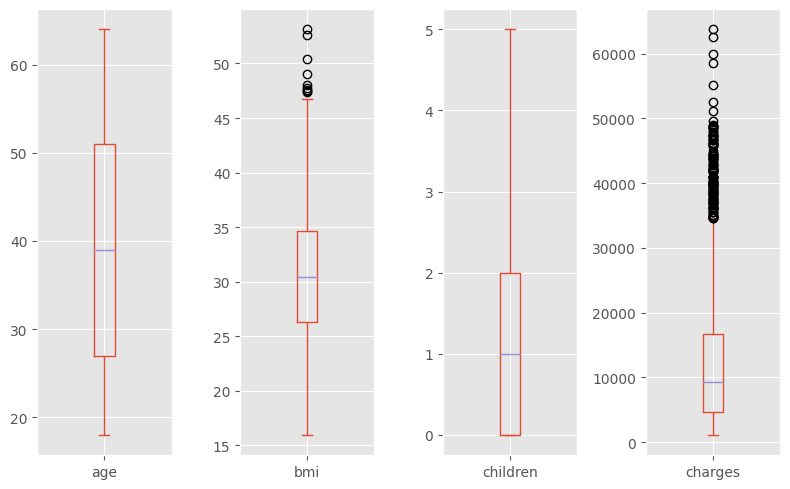

In [8]:
# Lets Check is there any Outlier:
df.plot(kind='box',subplots=True,figsize=(8,5))
plt.tight_layout()
plt.show()

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### we can see that in charges column we have 75% of charges aprox 17000 but the maximum charges we found that arpound 64000 so clearly we can see that that is a out lier we have to remove that

Skew%: 1.5158796580240388


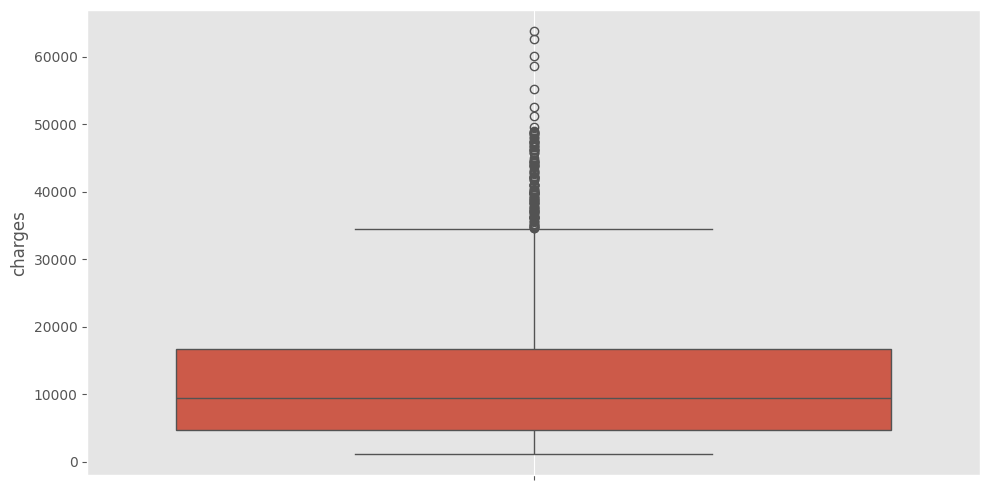

In [10]:
print('Skew%:',df.charges.skew())




# now creating box plot for charges:
plt.figure(figsize=(10,5))
sns.boxplot(df.charges)
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
# Now we are going to remove outlier usung Persentile method:
# becouse of Outlier in Upper limit side for treming considering only UL:


UL=df.charges.quantile(0.83)
LL=df.charges.quantile(0.17)

print('UL:',UL)
print('LL:',LL)

UL: 23077.8702873
LL: 3474.442536


In [12]:
#selectiong those column which have charges<=UL:
df=df[(df['charges'] <= UL)]

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Outlier detection on Bmi:

In [14]:
## Outlier detection on Bmi:

df.bmi.describe()

count    1110.000000
mean       30.181122
std         6.103185
min        15.960000
25%        25.800000
50%        29.820000
75%        34.005000
max        53.130000
Name: bmi, dtype: float64

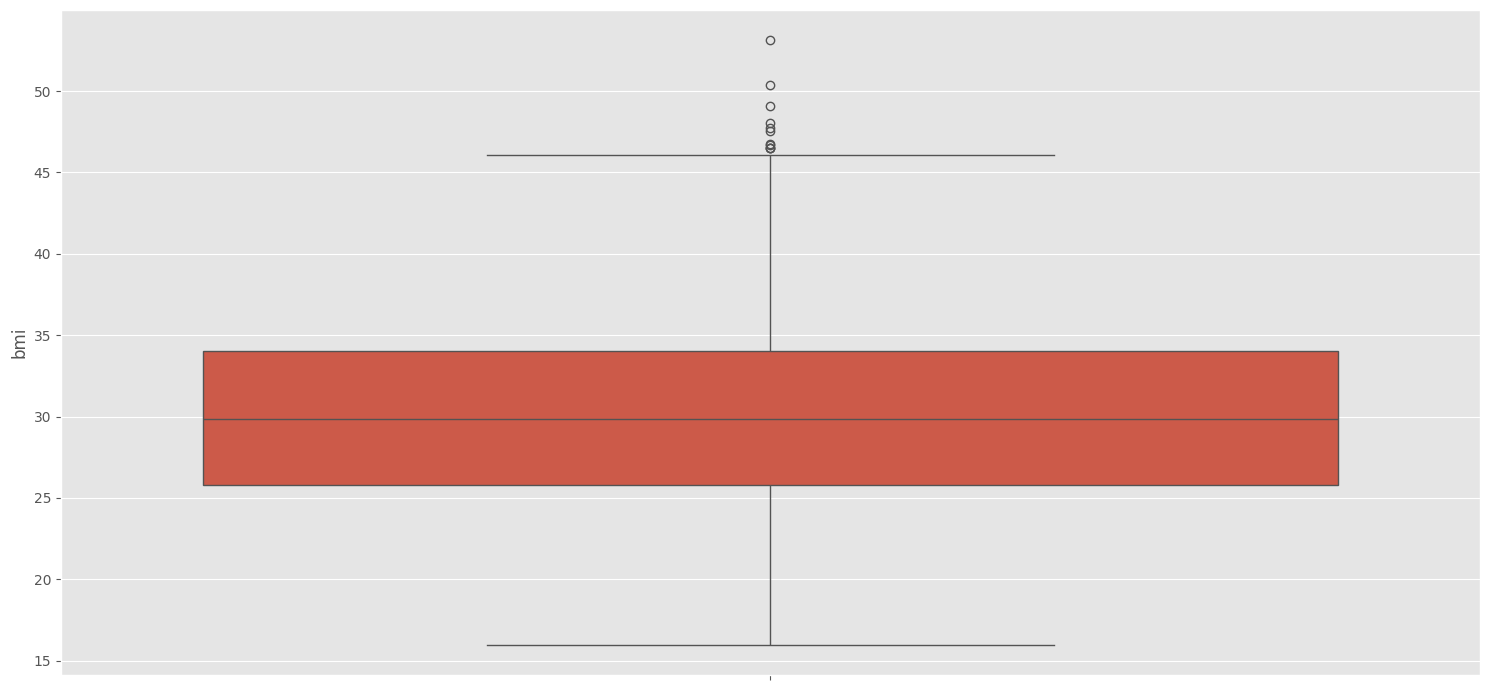

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(df.bmi)
plt.tight_layout()
plt.show()

###### BMI ranges
- below 18.5 – you're in the underweight range. 
- between 18.5 and 24.9 – you're in the healthy weight range.
- between 25 and 29.9 you're in the overweight range.
- between 30 and 39.9 – you're in the obese range

#### Best on information we are going to take Bmi <=46 becouse its removed the outlier and aslo fall in to Obese range:

In [16]:
# Now we are going to remove outlier usung Persentile method:
# becouse of Outlier in Upper limit side for treming considering only UL:


UL=df.bmi.quantile(0.98)
LL=df.bmi.quantile(0.02)

print('UL:',UL)
print('LL:',LL)

UL: 43.64599999999998
LL: 18.9221


In [17]:
df=df[df.bmi<=UL]

df.shape

(1087, 7)

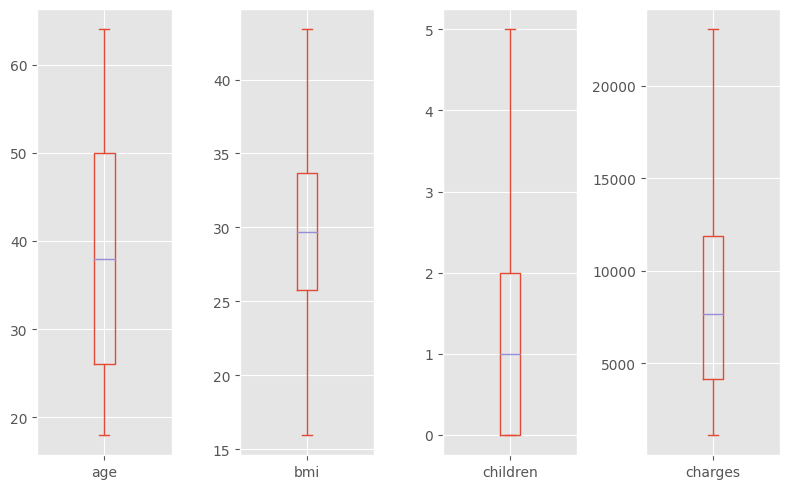

In [18]:
# Lets Check is there any Outlier:
df.plot(kind='box',subplots=True,figsize=(8,5))
plt.tight_layout()
plt.show()

In [19]:
df=df.reset_index(drop=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Selecting my x and y:

In [20]:
X=df.drop(columns='charges',axis=1)
y=df.charges

In [21]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [22]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [23]:
#Applying Onehotencoding:

OHE=OneHotEncoder()
OHE.fit(X[['sex','smoker','region']])

OneHotEncoder()

In [24]:
OHE.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

### Creating a Column Transformation Object:

In [25]:
from sklearn.compose import make_column_transformer

In [26]:
column_trans=make_column_transformer((OneHotEncoder(categories=OHE.categories_),['sex','smoker','region']),remainder='passthrough')

In [27]:
# we are using ShuffleSplit for Cross_validation Strategy:
ShuffleSplit_cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

Grd=GradientBoostingRegressor()
Lr=LinearRegression()

In [29]:
# Creating a estimetors list fro corssvalidation and VotingRegressor:

estimators=[('Grd',Grd),('Lr',Lr)]

## cross validation with imported algorithm to see which one is better performing:

In [30]:
from sklearn.model_selection import cross_val_score

for estimator in estimators:
    x = cross_val_score(estimator[1],column_trans.fit_transform(X),y,cv=ShuffleSplit_cv,scoring='r2')
    print(estimator[0],np.round(np.mean(x),2))
    
    
    
print('##As we can see that LinearRegression is good for this data set ') 


Grd 0.73
Lr 0.74
##As we can see that LinearRegression is good for this data set 


### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.90 as r2_score

In [31]:
from sklearn.pipeline import make_pipeline

scores_lr=[]
scores_grb=[]

for i in range(1000):
    X_train,X_test,Y_train,Y_test=train_test_split(column_trans.fit_transform(X),y,test_size=0.2,random_state=i)
    Grd=GradientBoostingRegressor()
    Lr=LinearRegression()
    
    pipe_lr=make_pipeline(Lr)
    pipe_Grb=make_pipeline(Grd)
    
    pipe_lr.fit(X_train,Y_train)
    pipe_Grb.fit(X_train,Y_train)
    
    y_pred_lr=pipe_lr.predict(X_test)
    scores_lr.append(r2_score(Y_test,y_pred_lr))
    
    y_pred_Grb=pipe_Grb.predict(X_test)
    scores_grb.append(r2_score(Y_test,y_pred_Grb))

In [32]:
print('random_state_value_Lr:',np.argmax(scores_lr))
print('Max_Score_Lr:',scores_lr[np.argmax(scores_lr)])

print('random_state_value_Grb:',np.argmax(scores_grb))
print('Max_Score_Grb:',scores_grb[np.argmax(scores_grb)])

random_state_value_Lr: 977
Max_Score_Lr: 0.9058268890609599
random_state_value_Grb: 452
Max_Score_Grb: 0.8791046396629648


###### So we can see that becouse of small data in train test split when we change random_state the model accurecy increasing for GradientBoostingRegressor and LinearRegression:

- we clearly see that LinearRegressor has higher accuracy on same random_state_value
- Now we are going to make a pipeline for LinearRegressor
    

#### Creat a pipeline for LinearRegressor:
- The best model is found at a certain random state


In [33]:
#importing necessary library:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

In [34]:
#Spliting the data:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores_grb))

In [35]:
# one hot encoding
trf1 = ColumnTransformer([
    ('OHE',OneHotEncoder(sparse=False,handle_unknown='ignore'),['sex','smoker','region'])
],remainder='passthrough')


# Scaling
trf2 = ColumnTransformer([
    ('scale',RobustScaler(),slice(0,11))
])

# train the model
trf3 = LinearRegression()

In [36]:
# making a pipeline:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

### for LinearRegressor:

In [37]:
# Traing the model:
pipe.fit(X_train,Y_train)

c:\Program Files\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', RobustScaler(),
                                                  slice(0, 11, None))])),
                ('trf3', LinearRegression())])

### calculating all metrics for Training data::

In [38]:
y_pred_train=pipe.predict(X_train)

print("All Calculation done On Training Data")
print('R2score',r2_score(Y_train,y_pred_train))
print('RMSE',np.sqrt(mean_squared_error(Y_train,y_pred_train)))
print('MAE',(mean_absolute_error(Y_train,y_pred_train)))

All Calculation done On Training Data
R2score 0.6850454524413101
RMSE 3029.7464523088956
MAE 1579.0805802405062


### calculating all metrics for testing data::

In [39]:
y_pred_Grb=pipe.predict(X_test)

print("All Calculation done On Testing Data")
print('R2score',r2_score(Y_test,y_pred_Grb))
print('RMSE',np.sqrt(mean_squared_error(Y_test,y_pred_Grb)))
print('MAE',(mean_absolute_error(Y_test,y_pred_Grb)))

All Calculation done On Testing Data
R2score 0.8708114897073356
RMSE 1863.608113899309
MAE 1145.2075899541283


### PRINT PREDICTED VALUES FOR LinearRegressor:

In [40]:
Predicted_values_GRB=pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_Grb,'Deference':Y_test-y_pred_Grb})
Predicted_values_GRB.head()

,Actual,Predicted,Deference
534,14394.39815,13726.0,668.39815
274,13217.09450,12622.0,595.09450
519,13143.86485,13016.0,127.86485
41,8059.67910,8912.0,-852.32090
228,22331.56680,21372.0,959.56680


### Plot the Output Result for Test Data OF LinearRegressor:

RMSE OF TRAIN: 3029.7464523088956
RMSE OF TEST: 1863.608113899309
MAE OF TRAIN 1579.0805802405062
MAE OF TEST 1145.2075899541283


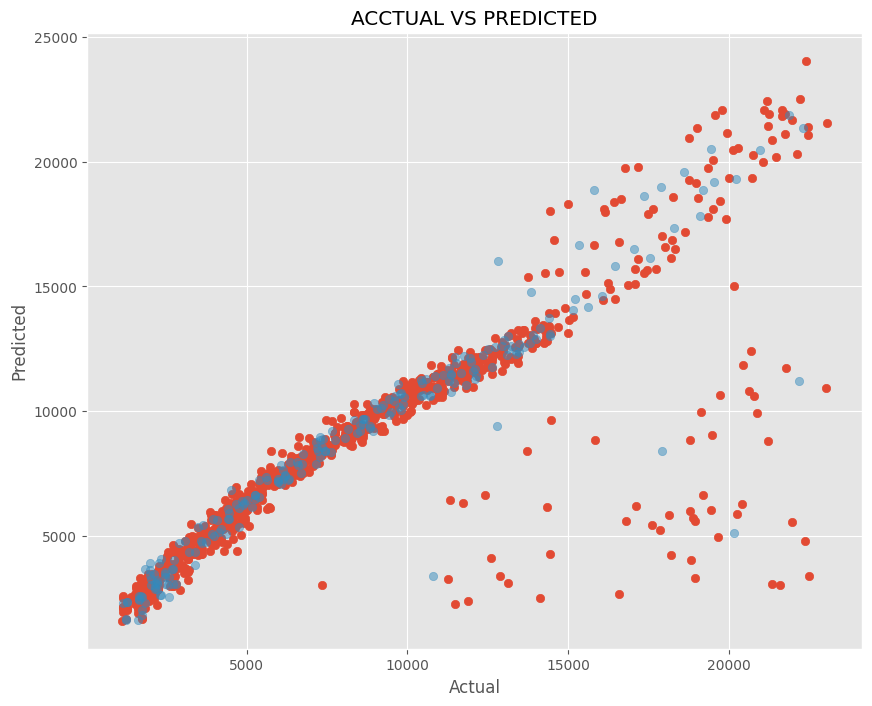

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(Y_train,y_pred_train)
plt.scatter(Y_test,y_pred_Grb,alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ACCTUAL VS PREDICTED')
print('RMSE OF TRAIN:',np.sqrt(mean_squared_error(Y_train,y_pred_train)))
print('RMSE OF TEST:',np.sqrt(mean_squared_error(Y_test,y_pred_Grb)))
print('MAE OF TRAIN',mean_absolute_error(Y_train,y_pred_train))
print('MAE OF TEST',(mean_absolute_error(Y_test,y_pred_Grb)))